In [49]:
from rdkit import Chem
from rdkit.Chem import Draw
import json
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = 'data/pdbbind/dataset/'

read mol2 files

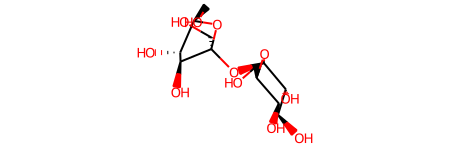

In [55]:
target_mol_name = "1a0t"
mol = Chem.MolFromMol2File(DATA_PATH + target_mol_name + "/" + target_mol_name + "_ligand.mol2")
test_mol = Draw.PrepareMolForDrawing(mol)
test_mol


In [56]:
num_bonds = len(test_mol.GetBonds())
num_atoms = len(test_mol.GetAtoms())

print("Number of bonds: ", num_bonds)
print("Number of atoms: ", num_atoms)

rdkit_bonds = {}

for i in range(num_bonds):
    init_atom = test_mol.GetBondWithIdx(i).GetBeginAtomIdx()
    end_atom = test_mol.GetBondWithIdx(i).GetEndAtomIdx()
    bond_type = test_mol.GetBondWithIdx(i).GetBondType()
    print("Bond: ", i, " " , init_atom, "-" , end_atom, " ", bond_type)
    rdkit_bonds[(init_atom, end_atom)] = i
    #CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O
# rdkit_bonds

Number of bonds:  24
Number of atoms:  23
Bond:  0   0 - 1   SINGLE
Bond:  1   0 - 6   SINGLE
Bond:  2   0 - 10   SINGLE
Bond:  3   1 - 2   SINGLE
Bond:  4   1 - 7   SINGLE
Bond:  5   2 - 3   SINGLE
Bond:  6   2 - 8   SINGLE
Bond:  7   3 - 4   SINGLE
Bond:  8   3 - 9   SINGLE
Bond:  9   4 - 5   SINGLE
Bond:  10   4 - 10   SINGLE
Bond:  11   5 - 11   SINGLE
Bond:  12   6 - 13   SINGLE
Bond:  13   13 - 12   SINGLE
Bond:  14   12 - 18   SINGLE
Bond:  15   13 - 14   SINGLE
Bond:  16   13 - 19   SINGLE
Bond:  17   14 - 15   SINGLE
Bond:  18   14 - 20   SINGLE
Bond:  19   15 - 16   SINGLE
Bond:  20   15 - 21   SINGLE
Bond:  21   16 - 17   SINGLE
Bond:  22   16 - 19   SINGLE
Bond:  23   17 - 22   SINGLE


read json interaction graph

In [22]:
with open(DATA_PATH + target_mol_name + "/" + target_mol_name + "_interaction_graph.json", 'r') as f:
  data = json.load(f)

print("Number of atoms: ", len(data['nodes']))
print("Number of bonds: ", len(data['edges']))

Number of atoms:  45
Number of bonds:  1024


In [26]:
print(data['nodes'])

[{'id': 0, 'attype': 'N', 'pl': 'L'}, {'id': 1, 'attype': 'N', 'pl': 'L'}, {'id': 2, 'attype': 'N', 'pl': 'L'}, {'id': 3, 'attype': 'N', 'pl': 'L'}, {'id': 4, 'attype': 'N', 'pl': 'L'}, {'id': 5, 'attype': 'N', 'pl': 'L'}, {'id': 6, 'attype': 'N', 'pl': 'L'}, {'id': 7, 'attype': 'N', 'pl': 'L'}, {'id': 8, 'attype': 'N', 'pl': 'L'}, {'id': 9, 'attype': 'N', 'pl': 'L'}, {'id': 10, 'attype': 'N', 'pl': 'L'}, {'id': 11, 'attype': 'O', 'pl': 'L'}, {'id': 12, 'attype': 'O', 'pl': 'L'}, {'id': 13, 'attype': 'O', 'pl': 'L'}, {'id': 14, 'attype': 'O', 'pl': 'L'}, {'id': 15, 'attype': 'O', 'pl': 'L'}, {'id': 16, 'attype': 'O', 'pl': 'L'}, {'id': 17, 'attype': 'O', 'pl': 'L'}, {'id': 18, 'attype': 'O', 'pl': 'L'}, {'id': 19, 'attype': 'CA', 'pl': 'L'}, {'id': 20, 'attype': 'CA', 'pl': 'L'}, {'id': 21, 'attype': 'CA', 'pl': 'L'}, {'id': 22, 'attype': 'CA', 'pl': 'L'}, {'id': 23, 'attype': 'CA', 'pl': 'L'}, {'id': 24, 'attype': 'CA', 'pl': 'L'}, {'id': 25, 'attype': 'CA', 'pl': 'L'}, {'id': 26, 'at

Visualize interaction graph - red atoms from Protein and lightblue atoms from Ligand

Number of nodes:  45
Number of edges:  247


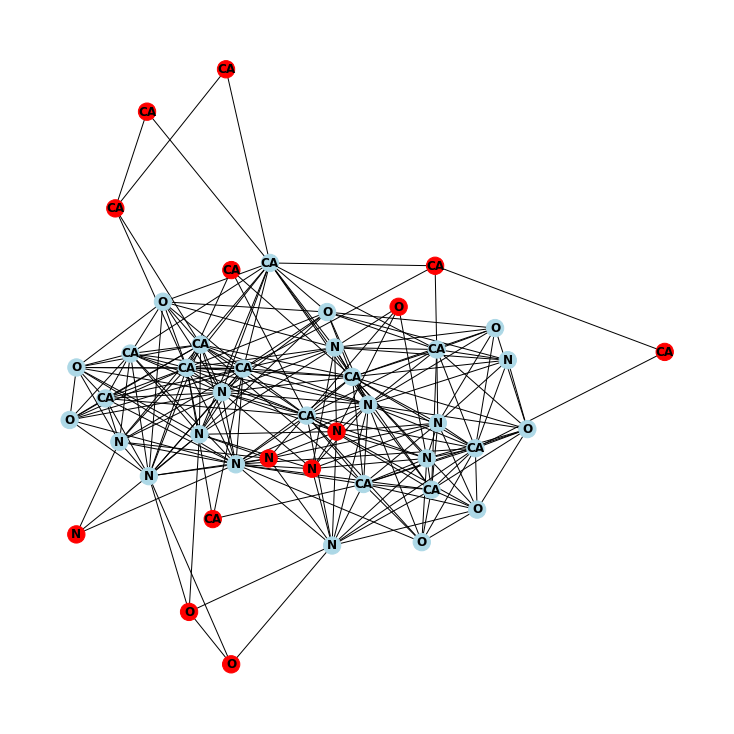

In [54]:
G = nx.Graph()

for edge in data['edges']:
    if edge["id1"] != None and edge["id2"] != None:
        G.add_edge(edge["id1"], edge["id2"], weight=edge["length"])

for node in data['nodes']:
    nx.set_node_attributes(G, {node["id"]: node["attype"]}, "atom_type")
    nx.set_node_attributes(G, {node["id"]: node["pl"]}, "from")

print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())

colors = ["red" if G.nodes[node]["from"] == "P" else "lightblue" for node in G.nodes]

# nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', labels=nx.get_node_attributes(G, 'atom_type'), node_color=colors)
# nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'))